Source kaggle dogs vs cats : https://www.kaggle.com/c/dogs-vs-cats
Source de téléchargement du dataset : https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [28]:
import os, shutil

#setup des dossiers pour la gestion des données du dataset
original_dataset_dir = 'C:/Users/Azelnoo/Documents/GitHub/data/dogsvscats'

base_dir = 'C:/Users/Azelnoo/Documents/GitHub/data/small_dogsvscats'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir= os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_dogs_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

validation_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

print("done")

done


In [54]:
# copie des 2000 premières images de chaque animal pour en faire un plus petit pour nos tests, 
# divisées entre l'entrainement, la validation et les tests

#chats
fnames = [str(i) + '.jpg' for i in range(1000)]
for fname in fnames:
    src = original_dataset_dir + '/cat/' + str(i) + '.jpg'
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = [str(i) + '.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = original_dataset_dir + '/cat/' + str(i) + '.jpg'
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = [str(i) + '.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = original_dataset_dir + '/cat/' + str(i) + '.jpg'
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)

#chiens
fnames = [str(i) + '.jpg' for i in range(1000)]
for fname in fnames:
    src = original_dataset_dir + '/dog/' + str(i) + '.jpg'
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = [str(i) + '.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = original_dataset_dir + '/dog/' + str(i) + '.jpg'
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = [str(i) + '.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = original_dataset_dir + '/dog/' + str(i) + '.jpg'
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [57]:
#Combien d'images nous avons ?
print("total training cat images:", len(os.listdir(train_cats_dir)))
print("total training dog images:", len(os.listdir(train_dogs_dir)))
print("total testing cat images:", len(os.listdir(test_cats_dir)))
print("total testing dog images:", len(os.listdir(test_dogs_dir)))
print("total validation cat images:", len(os.listdir(validation_cats_dir)))
print("total validation dog images:", len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total testing cat images: 500
total testing dog images: 500
total validation cat images: 500
total validation dog images: 500


In [64]:
from keras import layers
from keras import models

#Définition du modèle

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', 
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [66]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [67]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [68]:
for data_batch, label_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', label_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [70]:
history = model.fit_generator(
    train_generator,
    verbose=1,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 28s 285ms/step - loss: 0.6785 - acc: 0.5795 - val_loss: 0.7110 - val_acc: 0.5360
Epoch 2/30
100/100 [==============================] - 27s 265ms/step - loss: 0.6419 - acc: 0.6270 - val_loss: 0.6758 - val_acc: 0.6420
Epoch 3/30
100/100 [==============================] - 27s 265ms/step - loss: 0.5991 - acc: 0.6680 - val_loss: 0.5851 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 27s 270ms/step - loss: 0.5585 - acc: 0.7090 - val_loss: 0.6696 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 26s 257ms/step - loss: 0.5260 - acc: 0.7370 - val_loss: 0.7241 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 25s 254ms/step - loss: 0.5078 - acc: 0.7540 - val_loss: 0.4994 - val_acc: 0.7040
Epoch 7/30
100/100 [==============================] - 25s 254ms/step - loss: 0.4710 - acc: 0.7765 - val_loss: 0.8573 - val_acc: 0.6690
Epoch 8/30
100/100 [==============================] - 2

In [71]:
model.save('cats_and_dogs_small_1.h5')

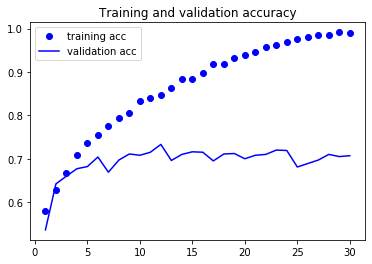

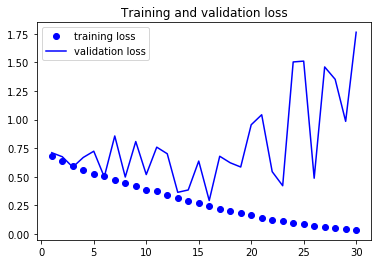

In [72]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc,'bo', label='training acc')
plt.plot(epochs, val_acc,'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label='training loss')
plt.plot(epochs, val_loss,'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()